# pyfolio單股tearsheet範例

## Import pyfolio and matplotlib

In [1]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\zyx\Documents\GitHub\quantopian\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


## 取得單股資料，並且要符合格式

In [2]:
# 使用yahoo取資料
stock_rets = pf.utils.get_symbol_rets('FB')
stock_rets.head(5)

[Timestamp('1970-01-01 00:00:00+0000', tz='UTC'), Timestamp('2020-04-17 00:00:00+0000', tz='UTC')]


date
2012-05-21 00:00:00+00:00   -0.109861
2012-05-22 00:00:00+00:00   -0.089039
2012-05-23 00:00:00+00:00    0.032258
2012-05-24 00:00:00+00:00    0.032187
2012-05-25 00:00:00+00:00   -0.033909
Name: FB, dtype: float64

In [28]:
# 或是你可以讀取範例資料
import pandas
data = pandas.read_csv('listed_data.csv')
data['coid'] = data['coid'].astype(str)
px = data[data['coid']=='2330']
px['date'] = pandas.to_datetime(px['zdate'],utc=True)
px.set_index('date', drop=False, inplace=True)
px['2330'] = px['報酬率-Ln']/100
stock_rets = px['2330'].dropna()
stock_rets.head(5)

date
2018-04-16 00:00:00+00:00   -0.004098
2018-04-17 00:00:00+00:00   -0.022846
2018-04-18 00:00:00+00:00    0.000000
2018-04-19 00:00:00+00:00    0.026945
2018-04-20 00:00:00+00:00   -0.065493
Name: 2330, dtype: float64

## 產生單股returns tear sheet


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,26.32,2019-12-17,2020-03-19,NaT,NaN
1,17.97,2018-09-27,2019-01-04,2019-04-08,138
2,14.73,2019-04-24,2019-05-23,2019-07-22,64
3,10.07,2018-04-19,2018-05-03,2018-07-20,67
4,7.08,2019-07-25,2019-08-13,2019-09-16,38


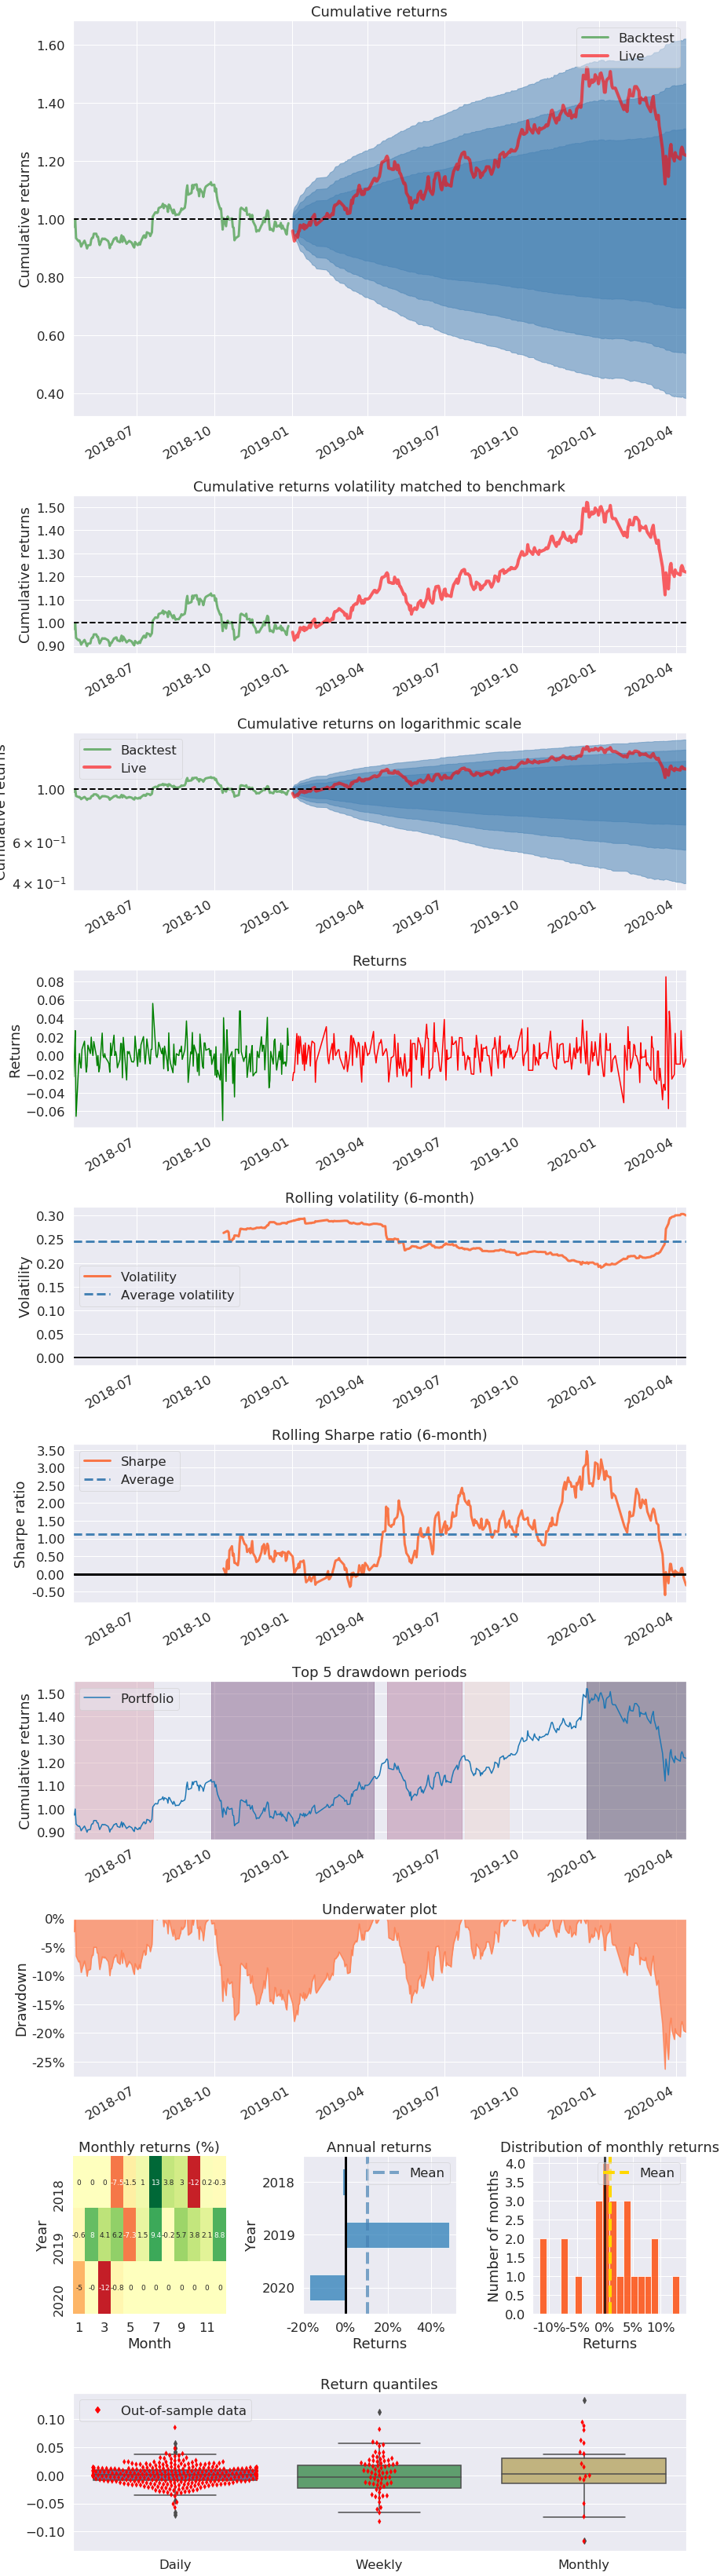

In [29]:
# 設定回測(revert view)時間點live_start_date
pf.create_returns_tear_sheet(stock_rets, live_start_date='2019-01-01')